In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.manifold import TSNE

from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.datasets import load_iris, load_digits

# Обучение без учителя 
<p>Курс "Модели и методы интеллектуального анализа данных"</p>
<p>Чернышов Юрий</p>
<p>к.ф.-м.н., доцент кафедры ИТЗИ УрГУПС (Екатеринбург)</p>
<p>yuchernyshov@usurt.ru</p>

# Содержание <a name='contents'></a>
<ol>
<li><a href='#intro'>Введение</a></li>
<li><a href='#cluster'>Кластеризация</a></li>
    <ol>
        <li><a name='kmeans'>KMeans</a></li>
        <li><a name='hierarchy'>Иерархическая кластеризация</a></li>
        <li><a name='dbscan'>DBSCAN</a></li>
    </ol>
<li><a href='#pca'>Понижение размерности</a></li>    
<li><a href='#ae'>Автокодировщики</a></li>    
<li><a href='#example1'>Пример 1: анализ датасета iris</a></li>
<li><a href='#example2'>Пример 2: наборы точек make_blobs</a></li>
<li><a href='#example3'>Пример 3: вложенные окружности make_circles </a></li>
<li><a href='#example4'>Пример 4: полумесяцы make_moons </a></li>
<li><a href='#links'>Ссылки</a></li>    
<li><a href='#hometask'>Домашнее задание</a></li>    
</ol>

# Введение <a name='intro'></a>

Обучение без учителя находит скрытые закономерности в группе объектов неразмеченного датасета, то есть для объектов у нас нет оценки с которой можем сравнивать результат.

Есть несколько типовых задач обучения без учителя:

- кластеризация - объединение группы объектов по общему признаку

- понижение размерности - выделение наиболее важных признаков

- автокодировщики - сжатие информации

<a href='#contents'>Назад к Содержанию</a>

# Кластеризация <a name='cluster'></a>



## KMeans <a name='kmeans'></a>

<a href='#contents'>Назад к Содержанию</a>

## Иерархическая кластеризация <a name='hierarchy'></a>

<a href='#contents'>Назад к Содержанию</a>

## DBSCAN <a name='dbscan'></a>

<a href='#contents'>Назад к Содержанию</a>

## Метод локтя <a name='elbow'></a>

In [15]:
data = make_blobs()

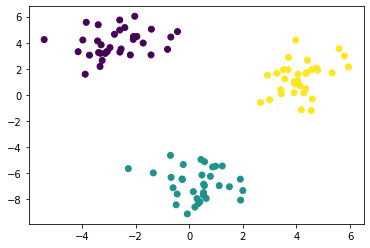

In [18]:
plt.scatter(data[0][:,0], data[0][:,1], c=data[1])
plt.show()

In [19]:
inertias_ = []
for k in range(1,6):
    model = KMeans(n_clusters=k)
    model.fit(data[0])
    inertias_.append(model.inertia_)
inertias_

[3105.2782919541723,
 1130.511645800231,
 213.6872596987651,
 177.60876822178835,
 144.30294963052745]

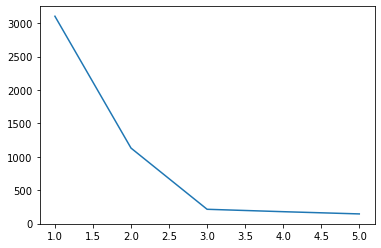

In [20]:
plt.plot(range(1,6), inertias_)
plt.show()

<a href='#contents'>Назад к Содержанию</a>

# Понижение размерности <a name='pca'></a>

Проклятие размерности это плохо. 

<a href='#contents'>Назад к Содержанию</a>

# Автокодировщики <a name='ae'></a>

Автокодировщики для изображений. 

<a href='#contents'>Назад к Содержанию</a>

# Пример 1: кластерный анализ датасета iris  <a name='example1'></a>

In [3]:
data = load_iris()

In [4]:
dir(data)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
model = KMeans(3)
result = model.fit_transform(data.data)

In [7]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [8]:
inertias = []

for i in range(1,10):
    model = KMeans(i)
    model.fit_transform(data.data)
    inertias.append(model.inertia_)

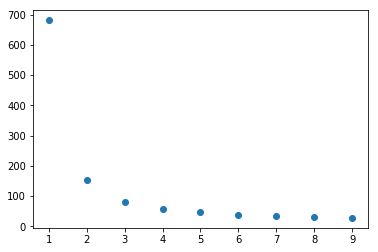

In [9]:
plt.scatter(range(1,10), inertias)
plt.show()

<a href='#contents'>Назад к Содержанию</a>

# Пример 2: наборы точек make_blobs  <a name='example2'></a>

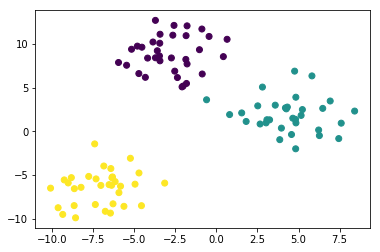

In [34]:
X, y = make_blobs(n_samples=100, shuffle=True, cluster_std=2, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

<a href='#contents'>Назад к Содержанию</a>

# Пример 3: вложенные окружности make_circles  <a name='example3'></a>

In [14]:
X, y = make_circles(n_samples=100,
                    shuffle=True,
                    noise=0.1,
                    random_state=42,
                    factor=0.6)

In [15]:
X.shape, y.shape

((100, 2), (100,))

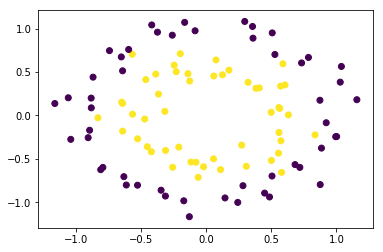

In [16]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

<a href='#contents'>Назад к Содержанию</a>

# Пример 4: полумесяцы make_moons:  <a name='example4'></a>

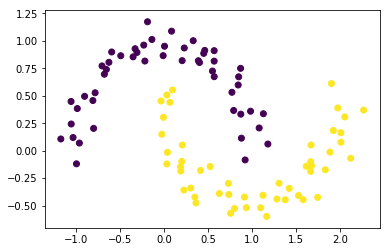

In [39]:
X, y = make_moons(n_samples=100, shuffle=True, noise=0.1, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

<a href='#contents'>Назад к Содержанию</a>

# Пример 5: использование TSNE для визуализации кластеров:  <a name='example5'></a>

In [4]:
data = load_digits()

In [5]:
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [7]:
tsne = TSNE(n_components=2)
result = tsne.fit_transform(data.data)

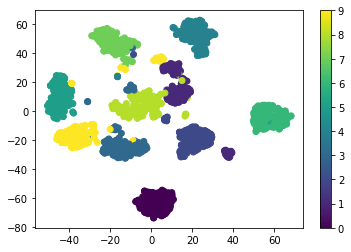

In [13]:
plt.scatter(result[:,0], result[:,1], c=data.target)
plt.colorbar()
plt.show()

<a href='#contents'>Назад к Содержанию</a>

# Ссылки <a name='links'></a>

- sklearn.cluster

<a href='#contents'>Назад к Содержанию</a>